# Load previously cleaned and merged properties (comps)

The file being imported below was constructed in the last seven exploratory notebooks (1.0 to 1.6). These data has been cleaned and merged so we can start the exploratory data analysis.

In [1]:
%load_ext autoreload
%autoreload 2

In [82]:
from pathlib import Path
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.definitions import ROOT_DIR
from src.data.utils import Table, save_pickle

In [4]:
comps_fn = ROOT_DIR / 'data/interim/2016/comps.pickle'
assert comps_fn.exists()

with open(comps_fn, 'rb') as f:
    comps = pickle.load(f)

In [6]:
comps.shape

(957686, 81)

In [7]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957686 entries, 0 to 957685
Data columns (total 81 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   acct                                            957686 non-null  uint64        
 1   dscr                                            957686 non-null  category      
 2   date_erected                                    957686 non-null  uint16        
 3   yr_remodel                                      86406 non-null   float64       
 4   im_sq_ft                                        957683 non-null  float64       
 5   act_ar                                          957686 non-null  uint16        
 6   heat_ar                                         957682 non-null  float64       
 7   gross_ar                                        957686 non-null  uint16        
 8   eff_ar                            

In [8]:
comps.sample(10)

,acct,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
62807,551080690012,Good,1940,1990.0,2960.0,3648,2960.0,3648,2941.0,316.0,...,0.0,192.0,0.0,Average,Extensive,Brick / Veneer,Crawl Space,B,Central Heat/AC,Average
204493,812950000001,Average,1952,1960.0,1401.0,1473,1401.0,1473,1425.0,180.0,...,0.0,42.0,0.0,Average,NaN,Shake Shingle,Slab,C,Central Heat/AC,Average
2667,70450220022,Superior,2003,NaN,5454.0,6654,5454.0,6654,5595.0,620.0,...,0.0,222.0,45.0,Average,New / Rebuilt,Stucco,Slab,X-,Central Heat/AC,Average
453091,1096410000013,Good,1977,NaN,2240.0,2290,2240.0,2290,2176.0,304.0,...,705.0,50.0,0.0,Very Good,NaN,Brick / Masonry,Slab,B-,Central Heat/AC,Good
585556,1150940070026,Average,1983,NaN,1600.0,2240,1600.0,2240,1788.0,204.0,...,0.0,0.0,0.0,Average,NaN,Brick / Masonry,Slab,C,Central Heat/AC,Average
531481,1142690080025,Average,1980,NaN,1662.0,2214,1662.0,2214,1872.0,276.0,...,0.0,0.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
553405,1145570020001,Average,1983,NaN,1491.0,1891,1491.0,1891,1643.0,238.0,...,0.0,0.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
459021,1099080000055,Average,1979,NaN,1643.0,2383,1643.0,2383,1856.0,226.0,...,0.0,50.0,0.0,Good,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
813959,1250660020041,Average,2005,NaN,2678.0,3098,2678.0,3098,2701.0,320.0,...,0.0,0.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
128201,720060040017,Excellent,2000,NaN,3963.0,4747,3963.0,4747,3961.0,486.0,...,0.0,315.0,0.0,Average,New / Rebuilt,Brick / Masonry,Slab,A+,Central Heat/AC,Average


## Drop account numbers
The account numbers are kept as a reference to the raw data, but should not be used in the EDA.

In [16]:
comps = comps.loc[:, 'dscr':]

In [17]:
comps.sample(10)

,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,fireplace_masonry_firebrick,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
881040,Average,2006,NaN,2365.0,2860,2365.0,2860,2432.0,306.0,0.0,...,0.0,75.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
491283,Average,1978,NaN,1709.0,2177,1709.0,2177,1885.0,216.0,1.0,...,0.0,0.0,28.0,Fair,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
696453,Average,1998,NaN,3105.0,3953,3105.0,3953,3239.0,364.0,0.0,...,714.0,0.0,55.0,Average,NaN,Frame / Concrete Blk,Slab,C+,Central Heat/AC,Average
556392,Average,1981,NaN,1108.0,1612,1108.0,1612,1298.0,182.0,0.0,...,0.0,0.0,24.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
379304,Average,1972,NaN,1747.0,2270,1747.0,2270,1919.0,200.0,1.0,...,0.0,459.0,64.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
726792,Average,2001,NaN,1500.0,1910,1500.0,1910,1654.0,200.0,0.0,...,0.0,0.0,30.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
212499,Average,1955,NaN,1518.0,1666,1518.0,1666,1541.0,180.0,0.0,...,0.0,40.0,0.0,Average,NaN,Shake Shingle,Slab,C,Central Heat,Average
229338,Average,1955,2010.0,2356.0,3366,2356.0,3366,2655.0,198.0,0.0,...,0.0,0.0,440.0,Very Good,Total,Brick / Veneer,Slab,C-,Central Heat/AC,Good
852362,Average,2007,NaN,1645.0,2182,1645.0,2182,1842.0,216.0,0.0,...,0.0,60.0,77.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
350829,Average,1960,NaN,1308.0,2070,1308.0,2070,1581.0,190.0,1.0,...,0.0,306.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average


# Preliminary report

Since there are 80 features in this dataset, it is best to explore them using an automated tool like [Sweetviz](https://github.com/fbdesignpro/sweetviz). This will take care of building the histograms and summary statistics for each feature, and also will provide an association plot between all the variables. I will select the variables from this plot to further investigate interesting associations.

## Reset dtypes to work with Sweetviz
Running `sweetviz` with the `comps` data "as is" was throwing a `TypeError` associated with the categorical columns, so here I change their type to `object`.

In [75]:
for col in comps.columns:
    if str(comps[col].dtype) == 'category':
        comps[col] = comps[col].astype('object')

In [76]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957686 entries, 0 to 957685
Data columns (total 80 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   dscr                                            957686 non-null  object        
 1   date_erected                                    957686 non-null  uint16        
 2   yr_remodel                                      86406 non-null   float64       
 3   im_sq_ft                                        957683 non-null  float64       
 4   act_ar                                          957686 non-null  uint16        
 5   heat_ar                                         957682 non-null  float64       
 6   gross_ar                                        957686 non-null  uint16        
 7   eff_ar                                          957685 non-null  float64       
 8   perimeter                         

## Run Sweetviz

In [10]:
import sweetviz as sv

Matplotlib is building the font cache; this may take a moment.


In [77]:
# This takes a long time to run (37 min), change flag to True if need to be re-run
if False:
    my_report = sv.analyze(comps, target_feat='tot_appr_val')
    my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

:FEATURES DONE:                    |█████████████████████| [100%]   16:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   21:16  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


The cell above creates a file (notebooks/01_Exploratory/SWEETVIZ_REPORT.html) with the resulting plots.

# Features exploration
Let's start by review the association plot in the sweetviz report.

![Sweetviz all variables association](figures/sv_all_variables_association.png)

Impressive!

There is a strong association in most variables in the top left quadrant. I'm particularly interested in exploring the associations with the total appraise value (`tot_appr_val`) so let's look at its individual association table.

![total apprasied value association tables](figures/tot_appr_val_associations_tables.png)

Now let's select the numerical and categorical features with strong association (> 0.59) to our target variable and examine these in detail.

In [79]:
strong_features = [
    'tot_appr_val',
    'prior_tot_appr_val',
    'prior_land_val',
    'land_val',
    'eff_ar',
    'bld_ar',
    'heat_ar',
    'im_sq_ft',
    'gross_ar',
    'act_ar',
    'fixtures_total',
    'perimeter',
    'room_full_bath',
    'grade_adjustment',
    'market_area_1_dscr',
    'market_area_2_dscr',
    'dscr',
]

# Selected features analysis

## Total appraised value: tot_appr_val

In [84]:
selected = comps.loc[:, strong_features]

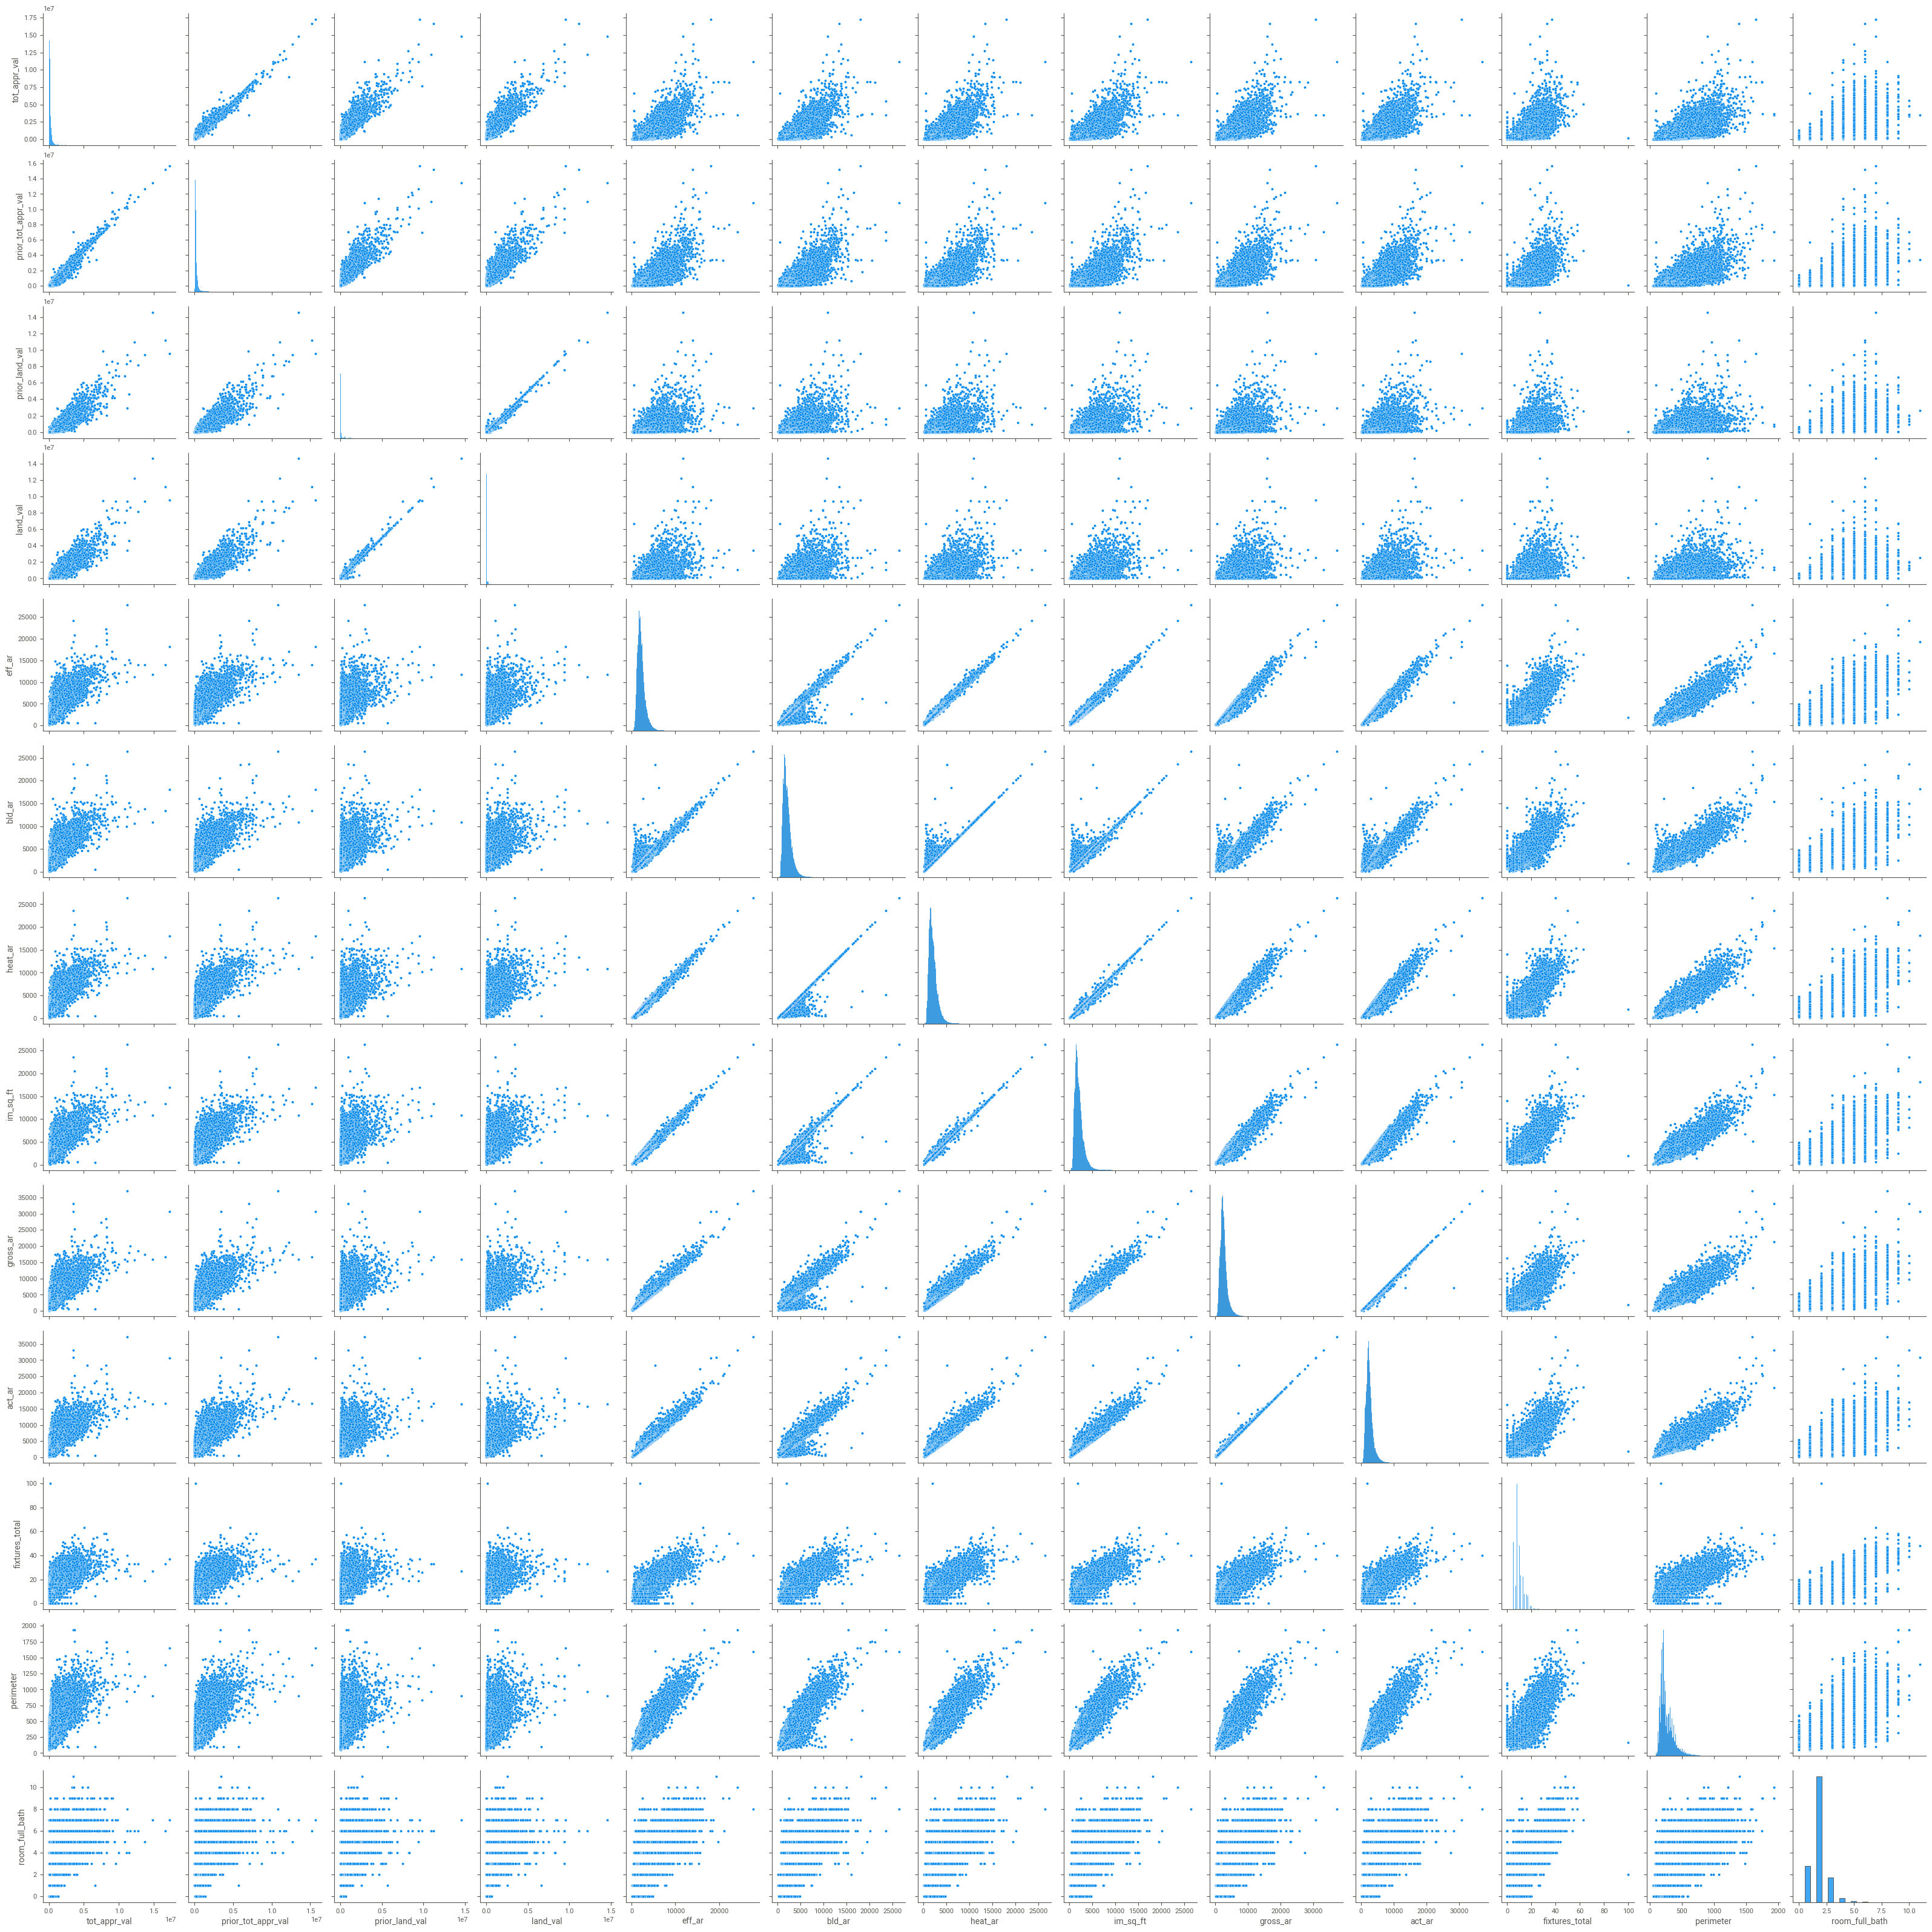

In [86]:
sns.pairplot(selected)

# Feature reduction
Is there a strong association between the different appraised values?

In [14]:
comps['dscr'].value_counts()

Average      602857
Good         217197
Low           74233
Excellent     52138
Superior       8012
Very Low       3236
Poor             13
Name: dscr, dtype: int64

In [15]:
comps['dscr']

0             Low
1             Low
2             Low
3             Low
4             Low
           ...   
957681    Average
957682    Average
957683    Average
957684    Average
957685    Average
Name: dscr, Length: 957686, dtype: category
Categories (7, object): ['Excellent' < 'Superior' < 'Good' < 'Average' < 'Low' < 'Very Low' < 'Poor']

# Export comps

In [17]:
save_fn = ROOT_DIR / 'data/interim/2016/comps.pickle'
save_pickle(comps, save_fn)